In [2]:
#Import Os and Basis Libraries
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
#Matplot Images
import matplotlib.image as mpimg
# Tensflow and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#Kernel Intilizer 
from sklearn.preprocessing import LabelEncoder
# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam , Adamax
#PreTrained Model
from tensorflow.keras.applications import *
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove 
import warnings 
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix

2025-05-06 22:18:08.670775: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746569888.693192     674 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746569888.700061     674 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746569888.718573     674 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746569888.718592     674 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746569888.718595     674 computation_placer.cc:177] computation placer alr

In [34]:
# Define the directory containing the "train" folder
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'

# Initialize lists to store file paths and corresponding labels
filepaths = []
labels = []

# Loop through each folder (label) in the train directory
for label_name in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label_name)
    
    # Loop through each image in the label folder
    for img_name in os.listdir(label_path):
        img_path = os.path.join(label_path, img_name)
        filepaths.append(img_path)
        labels.append(label_name)

# Create a DataFrame by combining the file paths and labels
df_train = pd.DataFrame({
    'filepath': filepaths,
    'label': labels
})

In [35]:
df_train

,filepath,label
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
...,...,...
5211,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
5212,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
5213,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
5214,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [5]:
# Define the directory containing the "train" folder
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'

# Initialize lists to store file paths and corresponding labels
filepaths = []
labels = []

# Loop through each folder (label) in the train directory
for label_name in os.listdir(test_dir):
    label_path = os.path.join(test_dir, label_name)
    
    # Loop through each image in the label folder
    for img_name in os.listdir(label_path):
        img_path = os.path.join(label_path, img_name)
        filepaths.append(img_path)
        labels.append(label_name)

# Create a DataFrame by combining the file paths and labels
df_test = pd.DataFrame({
    'filepath': filepaths,
    'label': labels
})

In [6]:
df_test

,filepath,label
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
...,...,...
619,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
620,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
621,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
622,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL


In [7]:
# Define the directory containing the "train" folder
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'

# Initialize lists to store file paths and corresponding labels
filepaths = []
labels = []

# Loop through each folder (label) in the train directory
for label_name in os.listdir(val_dir):
    label_path = os.path.join(val_dir, label_name)
    
    # Loop through each image in the label folder
    for img_name in os.listdir(label_path):
        img_path = os.path.join(label_path, img_name)
        filepaths.append(img_path)
        labels.append(label_name)

# Create a DataFrame by combining the file paths and labels
df_val = pd.DataFrame({
    'filepath': filepaths,
    'label': labels
})

In [8]:
df_val

,filepath,label
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
5,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
6,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
7,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
8,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
9,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL


In [9]:
# Shape
print(f"The shape of The Train data is: {df_train.shape}")
print(f"The shape of The Test data is: {df_test.shape}")
print(f"The shape of The Validation data is: {df_val.shape}")

The shape of The Train data is: (5216, 2)
The shape of The Test data is: (624, 2)
The shape of The Validation data is: (16, 2)


In [10]:
# Define paths
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'

# Set image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 123

# Create the training dataset
print('Training Images:')
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    validation_split=0.1,
    subset='training',
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Create the validation dataset
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    validation_split=0.1,
    subset='validation',
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Create the testing dataset
print('Testing Images:')
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)


Training Images:
Found 5216 files belonging to 2 classes.
Using 4695 files for training.


I0000 00:00:1746569896.720736     674 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746569896.724721     674 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Validation Images:
Found 5216 files belonging to 2 classes.
Using 521 files for validation.
Testing Images:
Found 624 files belonging to 2 classes.


In [11]:
# Extract labels
train_labels = train_ds.class_names
test_labels = test_ds.class_names
validation_labels = validation_ds.class_names

# Encode Labels

# Define your class labels
class_labels = ['NORMAL', 'PNEUMONIA'] 

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the class labels
label_encoder.fit(class_labels)

# Transform the labels for training dataset
train_labels_encoded = label_encoder.transform(train_labels)

# Transform the labels for validation dataset
validation_labels_encoded = label_encoder.transform(validation_labels)

# Transform the labels for test dataset
test_labels_encoded = label_encoder.transform(test_labels)

In [12]:
# Shape of the dataset
for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)
    print("Shape of y_train: ", labels_batch.shape)
    break

Shape of X_train:  (32, 224, 224, 3)
Shape of y_train:  (32,)


In [13]:
# Normalizing Pixel Values 

# Train Data 
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
# Val Data
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))
# Test Data
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

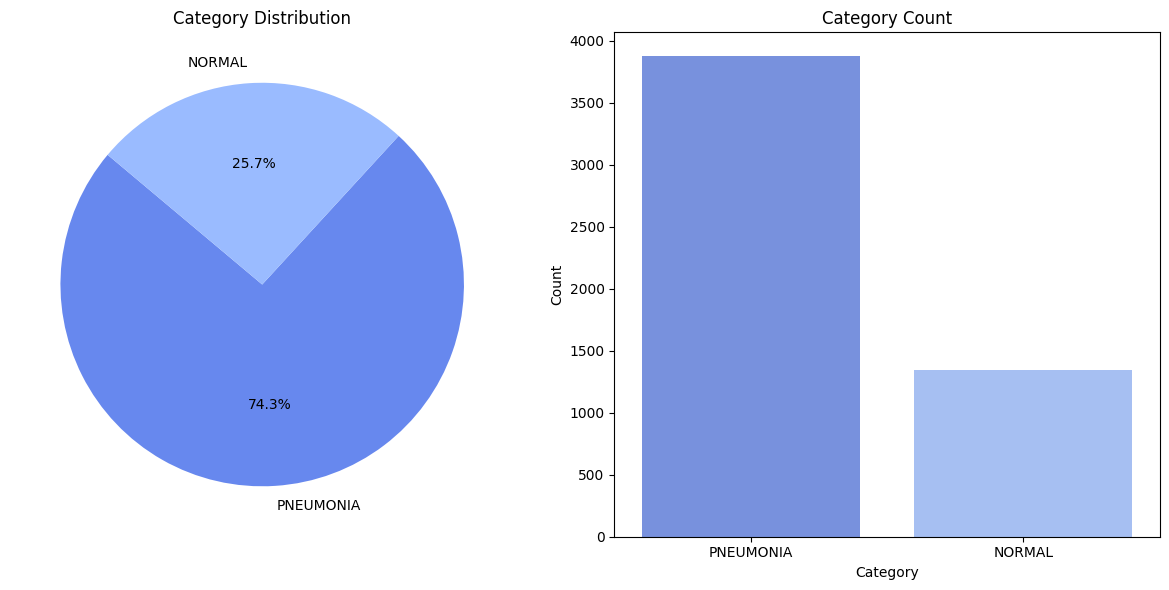

In [14]:
# Count the occurrences of each label
label_counts = df_train['label'].value_counts()

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Set the new color palette
palette = sns.color_palette("coolwarm")
sns.set_palette(palette)

# Plot the pie chart
axes[0].pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=palette
)
axes[0].set_title('Category Distribution')

# Plot the bar chart
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    ax=axes[1],
    palette=palette
)
axes[1].set_title('Category Count')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Category')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


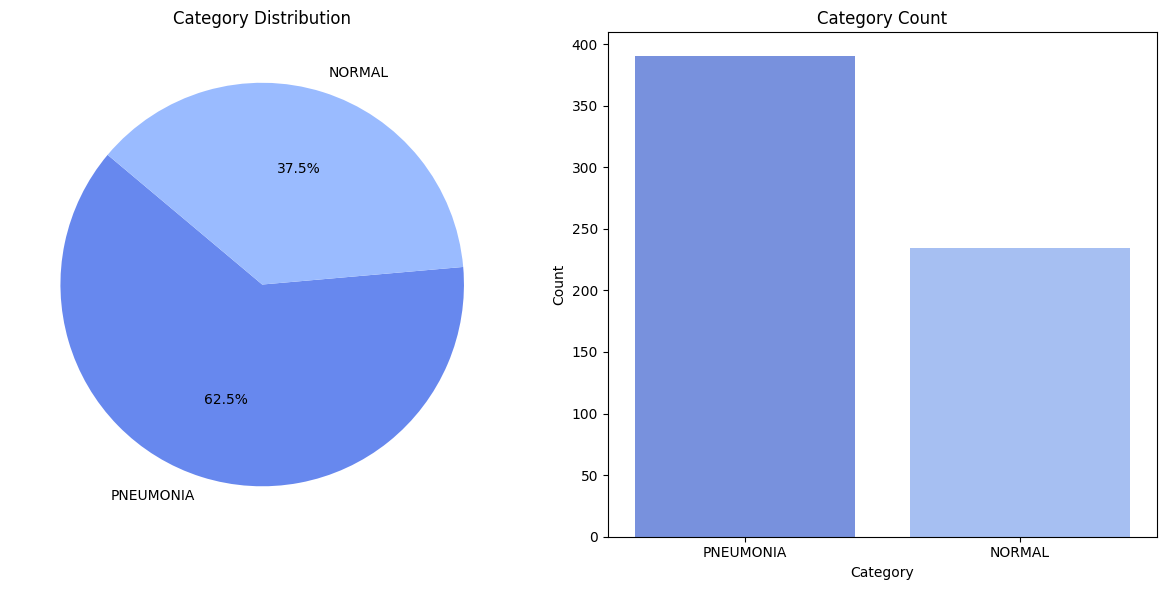

In [15]:
# Count the occurrences of each label
label_counts = df_test['label'].value_counts()

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Set the new color palette
palette = sns.color_palette("coolwarm")
sns.set_palette(palette)

# Plot the pie chart
axes[0].pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=palette
)
axes[0].set_title('Category Distribution')

# Plot the bar chart
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    ax=axes[1],
    palette=palette
)
axes[1].set_title('Category Count')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Category')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [16]:
def visualize_images(path, num_images=5):
    """
    Visualizes a set number of images from the specified directory.

    Parameters:
    - path (str): Directory containing images.
    - num_images (int): Number of images to visualize (default is 5).
    """
    # Get all image filenames in the given path
    image_filenames = os.listdir(path)
    
    # Make sure we don't exceed the number of available images
    num_images = min(num_images, len(image_filenames))
    
    # Set up the figure
    fig, axes = plt.subplots(1, num_images, figsize=(15, 4), facecolor='white')

    # If only one image, make axes iterable
    if num_images == 1:
        axes = [axes]

    # Loop through and display each image
    for idx, filename in enumerate(image_filenames[:num_images]):
        img_path = os.path.join(path, filename)
        image = mpimg.imread(img_path)
        
        axes[idx].imshow(image)
        axes[idx].axis('off')
        axes[idx].set_title(filename, fontsize=10)

    plt.tight_layout()
    plt.show()


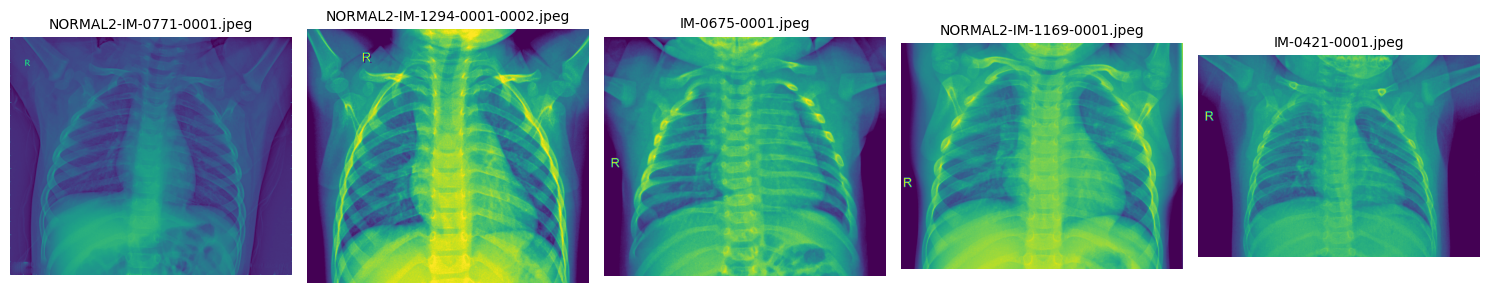

In [17]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

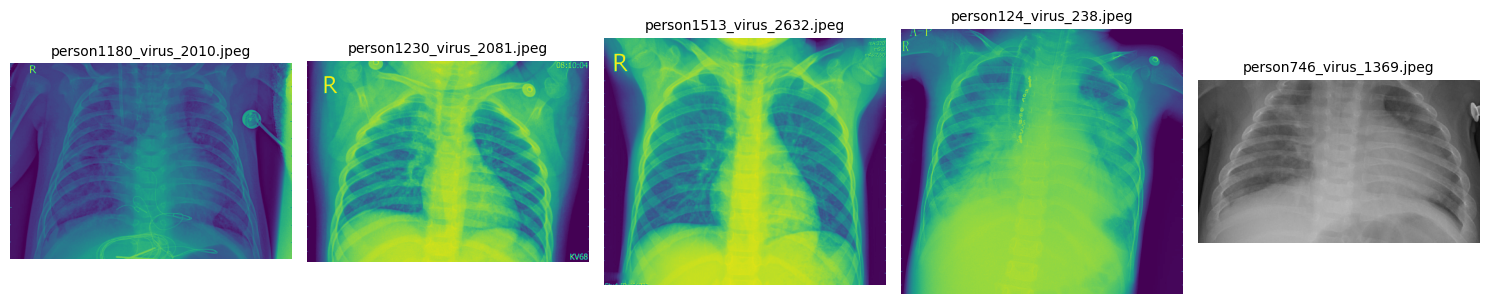

In [18]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense

# 1. Load the MobileNetV2 model (without the top layer for fine-tuning)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the model weights
for layer in base_model.layers:
    layer.trainable = False

# 2. Define the Keras input
input_layer = keras.Input(shape=(224, 224, 3), dtype=tf.float32)

# 3. Apply MobileNetV2 model
x = base_model(input_layer)

# 4. Add Global Average Pooling Layer
x = keras.layers.GlobalAveragePooling2D()(x)

# 5. Add Batch Normalization Layer
x = BatchNormalization()(x)

# 6. Add Dropout Layer 1
x = Dropout(0.45)(x)

# 7. Add Dense Layer 1
x = Dense(220, activation='relu')(x)

# 8. Add Dropout Layer 2
x = Dropout(0.25)(x)

# 9. Add Dense Layer 2
x = Dense(60, activation='relu')(x)

# 10. Add the Output Layer (Sigmoid for binary classification)
output_layer = Dense(1, activation='sigmoid')(x)

# 11. Define the full Keras Model using the functional API
model = keras.Model(inputs=input_layer, outputs=output_layer)

In [20]:
# Compile
model.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 220)                 │         281,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 220)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │          13,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              61 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,558,245 (9.76 MB)

 Trainable params: 297,701 (1.14 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

In [22]:
#Early_Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

#Fitting Model
history = model.fit(train_ds,
                        epochs= 10,
                        validation_data = validation_ds,
                        callbacks = early_stopping)

Epoch 1/10


I0000 00:00:1746569909.956239     735 service.cc:152] XLA service 0x7ef29c113260 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746569909.956273     735 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746569909.956277     735 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746569911.285393     735 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/147 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.6682 - loss: 0.5942 

I0000 00:00:1746569916.032990     735 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


147/147 ━━━━━━━━━━━━━━━━━━━━ 39s 176ms/step - accuracy: 0.8856 - loss: 0.2634 - val_accuracy: 0.9578 - val_loss: 0.1248
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - accuracy: 0.9527 - loss: 0.1215 - val_accuracy: 0.9770 - val_loss: 0.0870
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 16s 106ms/step - accuracy: 0.9573 - loss: 0.1115 - val_accuracy: 0.9712 - val_loss: 0.0808
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - accuracy: 0.9675 - loss: 0.0914 - val_accuracy: 0.9731 - val_loss: 0.0722
Epoch 5/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - accuracy: 0.9614 - loss: 0.0989 - val_accuracy: 0.9750 - val_loss: 0.0602
Epoch 6/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9709 - loss: 0.0828 - val_accuracy: 0.9693 - val_loss: 0.0666
Epoch 7/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - accuracy: 0.9680 - loss: 0.0887 - val_accuracy: 0.9770 - val_loss: 0.0518
Epoch 8/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 15s 102ms/step - accuracy: 0.9711 - loss: 0.0759 - val

In [23]:
model.save('pneumonia_detection_Vision_Model.keras')
model.save('pneumonia_detection_Vision_Model.h5')

In [24]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.9826 - loss: 0.0421
Validation Loss: 0.04574105143547058
Validation Accuracy: 0.9769673943519592


In [25]:
# Evaluate the model on the validation dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Print the validation loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - accuracy: 0.8832 - loss: 0.3734
Test Loss: 0.46546486020088196
Test Accuracy: 0.8685897588729858


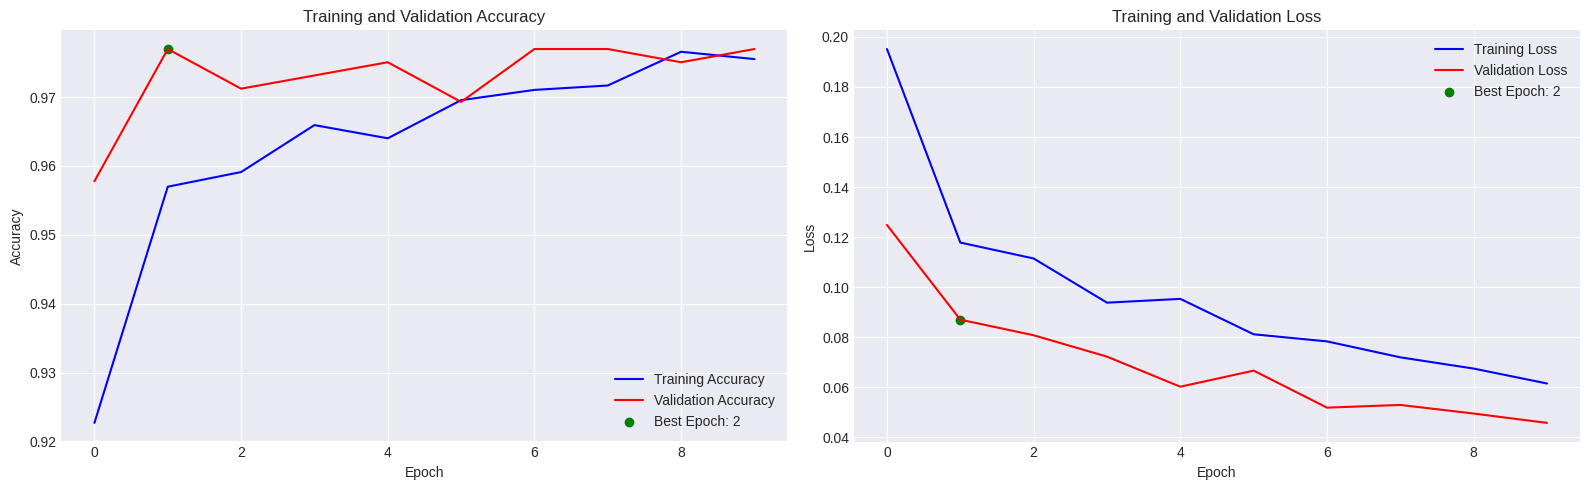

In [26]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('seaborn-darkgrid')

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


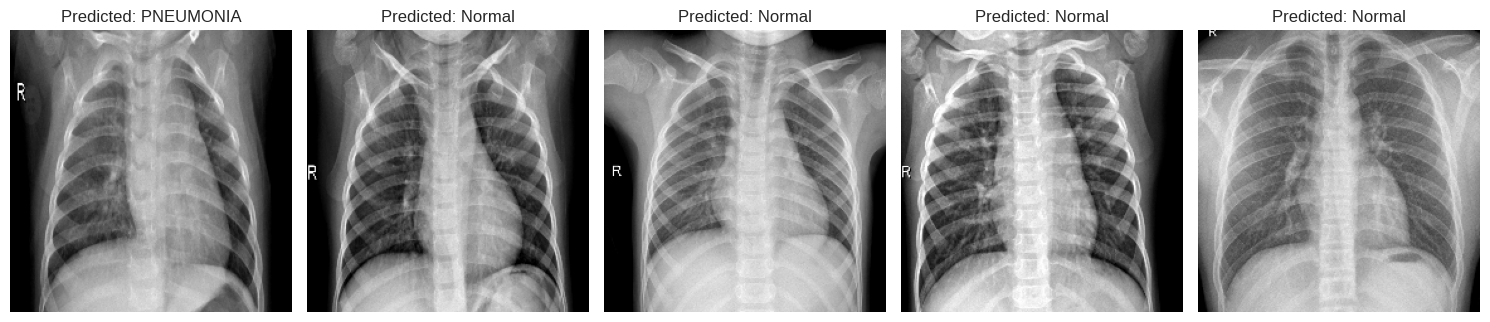

In [27]:
# Path to the directory containing the images
directory_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/'

# Select N image files from the directory
image_files = os.listdir(directory_path)[40:45]

# Create a figure and axes for subplots
fig, axs = plt.subplots(1, len(image_files), figsize=(15, 5))

# Load and preprocess each image, make predictions, and display them using a loop
for i, image_file in enumerate(image_files):
    img_path = os.path.join(directory_path, image_file)
    # Load the image using OpenCV
    img = cv2.imread(img_path)
    # Resize the image to (256, 256)
    img = cv2.resize(img, (224, 224)) 

    # Normalize pixel values
    img_array = img.astype(np.float32) / 255.0  

    # Expand the dimensions to match the input shape expected by the model
    img_array = np.expand_dims(img_array, axis=0)
    
     # Make predictions
    predictions = model.predict(img_array)
    actual_prediction = (predictions > 0.5).astype(int)
    
    # Display the image with predicted label
    # Convert BGR to RGB for displaying with matplotlib
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
    axs[i].axis('off')
    if actual_prediction[0][0] == 0:
        predicted_label = 'Normal'
    else:
        predicted_label = 'PNEUMONIA'
    axs[i].set_title(f'Predicted: {predicted_label}')

# Adjust layout
plt.tight_layout()
plt.show()


In [28]:
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)  # Output shape: (batch_size, 1)
    y_true.extend(labels.numpy())
    y_pred.extend((preds > 0.5).astype(int).flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


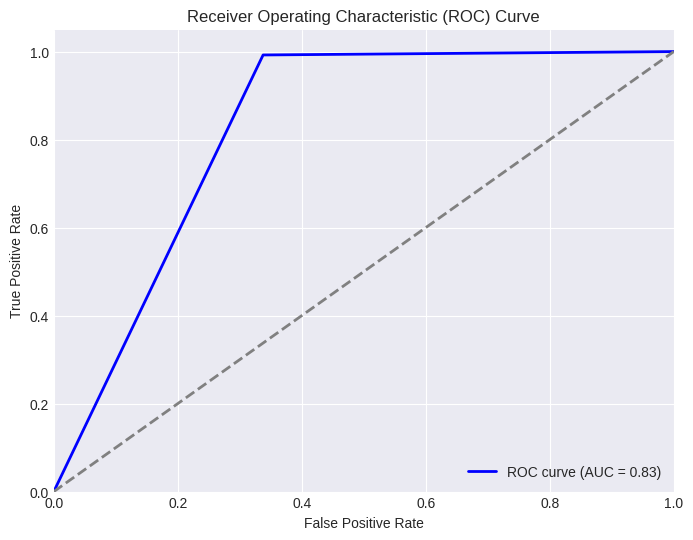

ROC AUC Score: 0.83


In [29]:
# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Calculate the ROC AUC score using sklearn's roc_auc_score
roc_auc_score_value = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the ROC AUC score
print(f'ROC AUC Score: {roc_auc_score_value:.2f}')

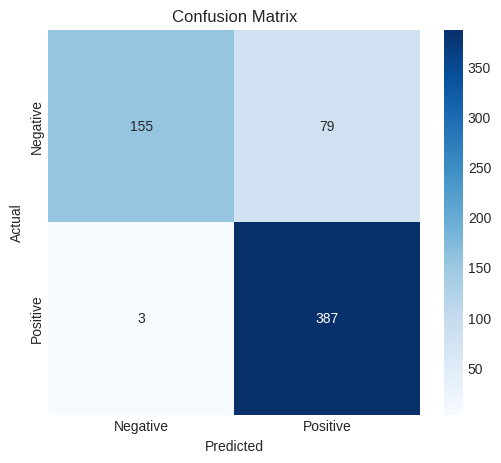

In [30]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
from sklearn.metrics import classification_report

# 4. Generate classification report
print(classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.98      0.66      0.79       234
   Pneumonia       0.83      0.99      0.90       390

    accuracy                           0.87       624
   macro avg       0.91      0.83      0.85       624
weighted avg       0.89      0.87      0.86       624



In [39]:
import os
import numpy as np
import gradio as gr
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import io

# Configuration
MODEL_PATH = "/kaggle/working/pneumonia_detection_Vision_Model.keras"  # or "xray_model.h5" depending on which you have
CLASSES = ["Normal", "Abnormal"]  # Update with your actual class names

def load_model():
    """Load the trained model."""
    try:
        model = keras.models.load_model(MODEL_PATH)
        print("Model loaded successfully!")
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

def preprocess_image(image):
    """Preprocess the image to make it compatible with the model."""
    # Convert to RGB if grayscale
    if image.mode != 'RGB':
        image = image.convert('RGB')
    
    # Resize to match model input size
    image = image.resize((224, 224))
    
    # Convert to numpy array and normalize
    img_array = np.array(image)
    img_array = img_array / 255.0  # Normalize to [0,1]
    
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array

def predict_xray(image):
    """Process the image and make a prediction."""
    if image is None:
        return {"Error": "No image provided"}
    
    try:
        # Load model if not already loaded
        global model
        if 'model' not in globals() or model is None:
            model = load_model()
            if model is None:
                return {"Error": "Failed to load model"}
        
        # Preprocess the image
        processed_image = preprocess_image(image)
        
        # Make prediction
        prediction = model.predict(processed_image)[0][0]
        
        # Get class prediction
        class_index = 1 if prediction > 0.5 else 0
        confidence = prediction if class_index == 1 else 1 - prediction
        
        # Format results
        result = {
            "Class": CLASSES[class_index],
            "Confidence": f"{confidence * 100:.2f}%"
        }
        
        return result
    
    except Exception as e:
        return {"Error": f"An error occurred: {str(e)}"}

# Create Gradio interface
def create_interface():
    with gr.Blocks(title="X-Ray Classification System") as app:
        gr.Markdown("# X-Ray Classification System")
        gr.Markdown("Upload an X-ray image for classification.")
        
        with gr.Row():
            with gr.Column(scale=1):
                input_image = gr.Image(type="pil", label="Upload X-ray Image")
                submit_btn = gr.Button("Analyze X-ray", variant="primary")
            
            with gr.Column(scale=1):
                output = gr.JSON(label="Classification Results")
                
        submit_btn.click(
            fn=predict_xray,
            inputs=input_image,
            outputs=output
        )
        
        gr.Markdown("## How to use")
        gr.Markdown("""
        1. Upload an X-ray image using the panel on the left
        2. Click the 'Analyze X-ray' button
        3. View the classification results on the right
        """)
        
        gr.Markdown("## About")
        gr.Markdown("""
        This application uses a deep learning model based on MobileNetV2 
        architecture to classify X-ray images. The model was trained on 
        medical X-ray datasets to identify abnormalities.
        """)
    
    return app

# For standalone execution
if __name__ == "__main__":
    # Make sure the model is loaded before starting the interface
    model = load_model()
    
    # Create and launch the interface
    app = create_interface()
    app.launch(share=True, server_name="127.1.1.1", server_port=9950)

Model loaded successfully!
* Running on local URL:  http://127.1.1.1:9950
* Running on public URL: https://6444c88e1873361dda.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [41]:
import os
import numpy as np
import gradio as gr
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import io
import datetime

# Configuration
MODEL_PATH = "/kaggle/working/pneumonia_detection_Vision_Model.keras"  # or "xray_model.h5" depending on which you have
CLASSES = ["Normal", "Abnormal"]  # Update with your actual class names
REPORT_PATH = "classification_report.txt"  # File to store classification results

def load_model():
    """Load the trained model."""
    try:
        model = keras.models.load_model(MODEL_PATH)
        print("Model loaded successfully!")
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

def preprocess_image(image):
    """Preprocess the image to make it compatible with the model."""
    # Convert to RGB if grayscale
    if image.mode != 'RGB':
        image = image.convert('RGB')
    
    # Resize to match model input size
    image = image.resize((224, 224))
    
    # Convert to numpy array and normalize
    img_array = np.array(image)
    img_array = img_array / 255.0  # Normalize to [0,1]
    
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array

def generate_report(image_path, class_name, confidence):
    """Generate a report of the classification."""
    with open(REPORT_PATH, 'a') as f:
        timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        report_line = f"{timestamp} | Image: {image_path} | Predicted: {class_name} | Confidence: {confidence:.2f}%\n"
        f.write(report_line)

def predict_xray(image):
    """Process the image and make a prediction."""
    if image is None:
        return {"Error": "No image provided"}
    
    try:
        # Load model if not already loaded
        global model
        if 'model' not in globals() or model is None:
            model = load_model()
            if model is None:
                return {"Error": "Failed to load model"}
        
        # Preprocess the image
        processed_image = preprocess_image(image)
        
        # Make prediction
        prediction = model.predict(processed_image)[0][0]
        
        # Get class prediction
        class_index = 1 if prediction > 0.5 else 0
        confidence = prediction if class_index == 1 else 1 - prediction
        
        # Get predicted class name
        predicted_class = CLASSES[class_index]
        
        # Generate report
        image_path = "uploaded_image.jpg"  # Replace with actual path if needed
        generate_report(image_path, predicted_class, confidence * 100)
        
        # Format results
        result = {
            "Class": predicted_class,
            "Confidence": f"{confidence * 100:.2f}%",
            "Report": f"Classification result has been saved in {REPORT_PATH}."
        }
        
        return result
    
    except Exception as e:
        return {"Error": f"An error occurred: {str(e)}"}

# Create Gradio interface
def create_interface():
    with gr.Blocks(title="X-Ray Classification System") as app:
        gr.Markdown("# X-Ray Classification System")
        gr.Markdown("Upload an X-ray image for classification.")
        
        with gr.Row():
            with gr.Column(scale=1):
                input_image = gr.Image(type="pil", label="Upload X-ray Image")
                submit_btn = gr.Button("Analyze X-ray", variant="primary")
            
            with gr.Column(scale=1):
                output = gr.JSON(label="Classification Results")
                
        submit_btn.click(
            fn=predict_xray,
            inputs=input_image,
            outputs=output
        )
        
        gr.Markdown("## How to use")
        gr.Markdown("""
        1. Upload an X-ray image using the panel on the left
        2. Click the 'Analyze X-ray' button
        3. View the classification results on the right
        4. A report of the classification will be saved with the details.
        """)
        
        gr.Markdown("## About")
        gr.Markdown("""
        This application uses a deep learning model based on MobileNetV2 
        architecture to classify X-ray images. The model was trained on 
        medical X-ray datasets to identify abnormalities.
        """)
    
    return app

# For standalone execution
if __name__ == "__main__":
    # Make sure the model is loaded before starting the interface
    model = load_model()
    
    # Create and launch the interface
    app = create_interface()
    app.launch(share=True, server_name="127.1.1.1", server_port=9850)


Model loaded successfully!
* Running on local URL:  http://127.1.1.1:9850
* Running on public URL: https://dbbeb05ca113b7a93a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
